<a href="https://colab.research.google.com/github/Gabriela2685/Simulacion2/blob/main/Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pymc

In [2]:
!pip install arviz

In [10]:
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

In [4]:
tests_totales = 50
tests_positivos = 10

In [5]:
with pm.Model() as modelo_test_perfecto:
  prob = pm.Uniform(name='prob', # Variables a estimar
                    lower=0,
                    upper=1)
  casos_positivos = pm.Binomial(name='casos_positivos', # Definicion de los datos a estimar
                                n=tests_totales,
                                p=prob,
                                observed=tests_positivos)
  trace_test_perfecto = pm.sample(3000) # Saca 3000 muestras
                                        # Aqui se define el modelo matématico

Output()

Output()

In [11]:
# Access the posterior group of the InferenceData object
posterior = trace_test_perfecto.posterior

# Stack the chains and draws to create a single array
vals = posterior['prob'].stack(sample=('chain', 'draw'))

# Extract the values
valores_prob = vals.values

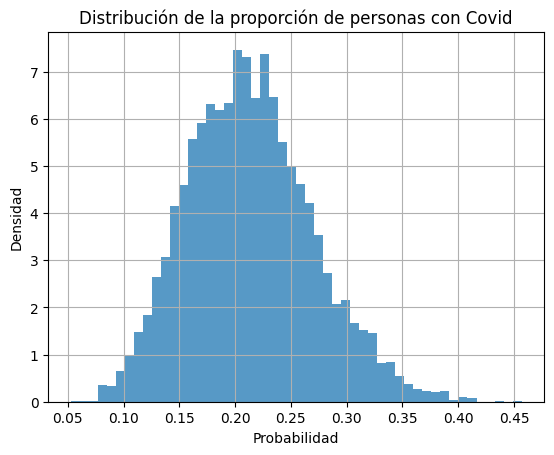

In [28]:
# Crear el histograma de las muestras de probabilidad
plt.hist(valores_prob, bins=50, density=True, alpha=0.75)
plt.xlabel('Probabilidad')
plt.ylabel('Densidad')
plt.title('Distribución de la proporción de personas con Covid')
plt.grid(True)
plt.show()


In [25]:
muestras_prob = posterior['prob'].stack(sample=('chain', 'draw'))
# Use .where() to filter and then count the values
# Probabilidad de que menos de __ de la pob esten infectados
len(muestras_prob.where(muestras_prob < 0.2).dropna(dim='sample')) / len(muestras_prob)

0.41983333333333334

In [21]:
with pm.Model() as modelo_fp:
  prob_cov = pm.Uniform(name='prob_cov', # Variables a estimar
                    lower=0,
                    upper=1)
  prob_fp = 0.1 # Probabilidad de falsos negativos
  prob_test_positivo = prob_cov + (1-prob_cov)*prob_fp
  casos_positivos = pm.Binomial(name='casos_positivos',
                                n=tests_totales,
                                p=prob_test_positivo,
                                observed=tests_positivos)
  modelo_fp = pm.sample(3000)

Output()

Output()

In [26]:
muestras_prop = modelo_fp.posterior['prob_cov'].stack(sample=('chain', 'draw'))
len(muestras_prop.where(muestras_prop < 0.2).dropna(dim='sample')) / len(muestras_prop)

0.885

In [23]:
lab_fp_observados = 10
lab_tests_hechos = 100

with pm.Model() as modelo_incetidumbre:
  prob_fp = pm.Uniform(name='prob_fp',
                    lower=0,
                    upper=1)

  test_falsos_positivos = pm.Binomial(name='test_falsos_positivos',
                                n=lab_tests_hechos,
                                p=prob_fp,
                                observed=lab_fp_observados)

  prob_cov = pm.Uniform(name='prob_cov',
                    lower=0,
                    upper=1)
  prob_test_positivo = prob_cov + (1-prob_cov)*prob_fp
  casos_positivos = pm.Binomial(name='casos_positivos',
                                n=tests_totales,
                                p=prob_test_positivo,
                                observed=tests_positivos)
  trace_modelo_incertidumbre = pm.sample(3000)

Output()

Output()

In [27]:
muestras_prop = trace_modelo_incertidumbre.posterior['prob_cov'].stack(sample=('chain', 'draw'))
len(muestras_prop.where(muestras_prop < 0.2).dropna(dim='sample')) / len(muestras_prop)

0.8785